In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


In [ ]:

# Define paths
train_dir = '/content/traffic_sign_dataset/traffic_Data/DATA'
val_dir = '/content/traffic_sign_dataset/traffic_Data/TEST'

# Image data generators for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)





Found 4170 images belonging to 58 classes.


In [7]:
# Load the ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
historyr50=model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save('Resnet50_traffic_sign_classifier.h5')

Epoch 1/10
131/131 [==============================] - 59s 428ms/step - loss: 3.4754 - accuracy: 0.1338
Epoch 2/10
131/131 [==============================] - 55s 422ms/step - loss: 3.1918 - accuracy: 0.1727
Epoch 3/10
131/131 [==============================] - 56s 429ms/step - loss: 3.0365 - accuracy: 0.2053
Epoch 4/10
131/131 [==============================] - 57s 432ms/step - loss: 2.9216 - accuracy: 0.2221
Epoch 5/10
131/131 [==============================] - 57s 432ms/step - loss: 2.8465 - accuracy: 0.2331
Epoch 6/10
131/131 [==============================] - 56s 425ms/step - loss: 2.7581 - accuracy: 0.2595
Epoch 7/10
131/131 [==============================] - 57s 436ms/step - loss: 2.6845 - accuracy: 0.2827
Epoch 8/10
131/131 [==============================] - 56s 429ms/step - loss: 2.6089 - accuracy: 0.2823
Epoch 9/10
131/131 [==============================] - 57s 437ms/step - loss: 2.5454 - accuracy: 0.3022
Epoch 10/10
131/131 [==============================] - 57s 431ms/step - l

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
acc = historyr50.history['accuracy']
val_acc = historyr50.history['val_accuracy']
loss = historyr50.history['loss']
val_loss = historyr50.history['val_loss']

epochs = len(acc) # Get the number of epochs from the history object

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(epochs), acc, label='Training Accuracy')
plt.plot(range(epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(range(epochs), loss, label='Training Loss')
plt.plot(range(epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Display the maximum validation accuracy
print("Maximum Validation Accuracy:", max(val_acc))

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_vgg = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save('VGG16_traffic_sign_classifier.h5')


58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10
131/131 [==============================] - 67s 454ms/step - loss: 2.3833 - accuracy: 0.4235
Epoch 2/10
131/131 [==============================] - 58s 441ms/step - loss: 1.1881 - accuracy: 0.7036
Epoch 3/10
131/131 [==============================] - 57s 435ms/step - loss: 0.8088 - accuracy: 0.7894
Epoch 4/10
131/131 [==============================] - 56s 426ms/step - loss: 0.6273 - accuracy: 0.8336
Epoch 5/10
131/131 [==============================] - 58s 441ms/step - loss: 0.4879 - accuracy: 0.8724
Epoch 6/10
131/131 [==============================] - 56s 429ms/step - loss: 0.4179 - accuracy: 0.8866
Epoch 7/10
131/131 [==============================] - 57s 437ms/step - loss: 0.3453 - accuracy: 0.9070
Epoch 8/10
131/131 [==============================] - 57s 435ms/step - loss: 0.3089 - accuracy: 0.9141
Epoch 9/10
131/131 [==============================] - 56s 425ms/step - loss: 0.2749 - accuracy: 0.9254
Epoch 10

In [9]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the InceptionV3 model without the top layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_inception = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save('InceptionV3_traffic_sign_classifier.h5')


87910968/87910968 [==============================] - 1s 0us/step
Epoch 1/10
131/131 [==============================] - 63s 423ms/step - loss: 1.5810 - accuracy: 0.6165
Epoch 2/10
131/131 [==============================] - 56s 422ms/step - loss: 0.5886 - accuracy: 0.8278
Epoch 3/10
131/131 [==============================] - 56s 424ms/step - loss: 0.4397 - accuracy: 0.8643
Epoch 4/10
131/131 [==============================] - 54s 415ms/step - loss: 0.3552 - accuracy: 0.8918
Epoch 5/10
131/131 [==============================] - 56s 426ms/step - loss: 0.3212 - accuracy: 0.8947
Epoch 6/10
131/131 [==============================] - 55s 416ms/step - loss: 0.2698 - accuracy: 0.9098
Epoch 7/10
131/131 [==============================] - 56s 431ms/step - loss: 0.2432 - accuracy: 0.9197
Epoch 8/10
131/131 [==============================] - 55s 417ms/step - loss: 0.2183 - accuracy: 0.9209
Epoch 9/10
131/131 [==============================] - 54s 416ms/step - loss: 0.1960 - accuracy: 0.9321
Epoch 10

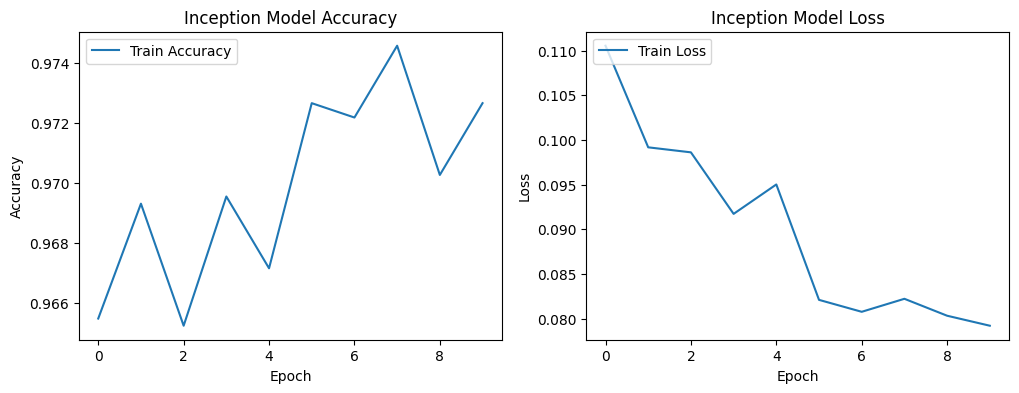

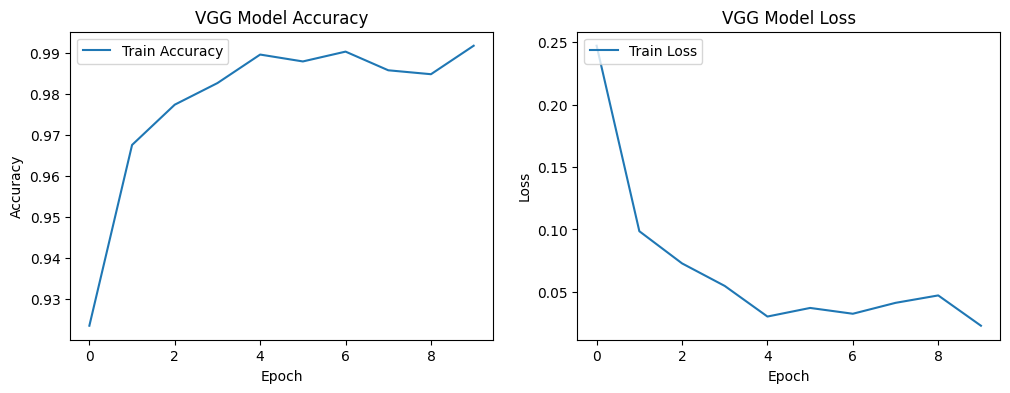

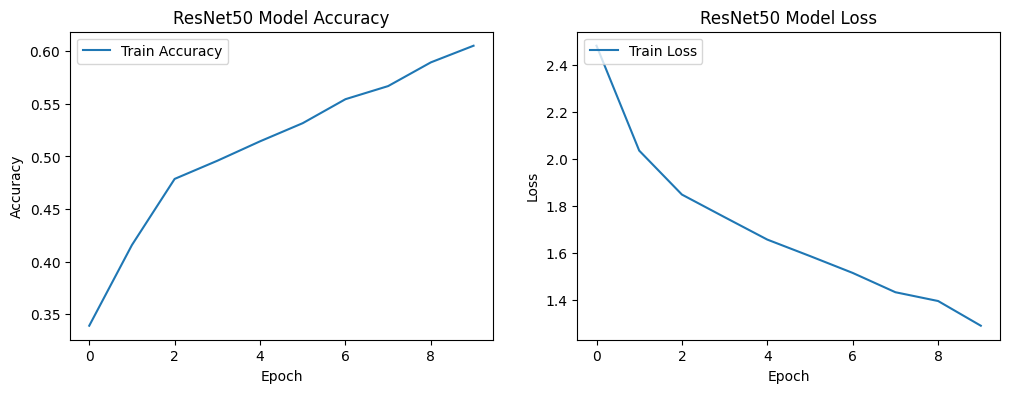

In [13]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    # plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    # plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

# Plot for Inception model
plot_history(history_inception, 'Inception')

# Assuming you have history_vgg and history_resnet50 from training VGG and ResNet50 models
# Plot for VGG model
plot_history(history_vgg, 'VGG')

# Plot for ResNet50 model
plot_history(historyr50, 'ResNet50')
